In [237]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
%matplotlib notebook

In [252]:
df = pd.read_csv('results/Chemical Space Measure Benchmark - databases qed+sa.csv')

In [253]:
df

,Database,Richness,#Circles (0.75),Diversity,SumBottleneck,#FG,#RS,#BM
0,ZINC-250k,173731.0,2035.0,0.861,1106.10,1952.0,2940.0,92715.0
1,ZINC-250k,NaN,2084.0,0.861,1096.43,NaN,NaN,NaN
2,ZINC-250k,NaN,2040.0,0.863,1115.64,NaN,NaN,NaN
3,ENAMINE,427366.0,1229.0,0.851,2461.75,142.0,1268.0,187742.0
4,ENAMINE,NaN,1275.0,0.851,2402.39,NaN,NaN,NaN
5,ENAMINE,NaN,1263.0,0.851,2375.03,NaN,NaN,NaN
6,MOSES,1846492.0,1714.0,0.856,8832.55,938.0,4513.0,413521.0
7,MOSES,NaN,1698.0,0.855,8955.37,NaN,NaN,NaN
8,MOSES,NaN,1720.0,0.855,8971.22,NaN,NaN,NaN
9,ChEMBL,967322.0,4570.0,0.872,5423.73,6304.0,14004.0,317255.0


In [254]:
df = df[:15]

In [255]:
df_grouped = df.groupby('Database', sort=False)
df_grouped

In [256]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}

index = df_grouped.mean().index
column0 = 'Richness'
column1 = '#Circles (0.75)'
column0_val = df_grouped.mean()[column0]
column1_val = df_grouped.mean()[column1]

<IPython.core.display.Javascript object>


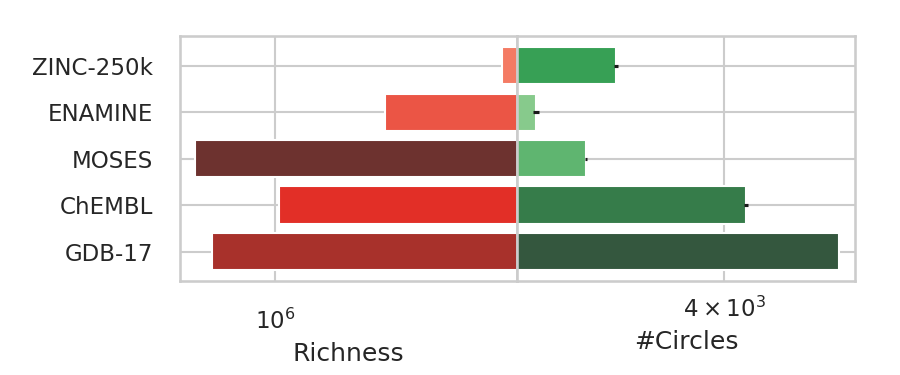

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [261]:
fig, axes = plt.subplots(figsize=(6,2.5), ncols=2, sharey=True)
fig.tight_layout()

pal0 = sns.color_palette("Reds_d", 5)
rank0 = df_grouped.mean()[column0].argsort().argsort()
pal1 = sns.color_palette("Greens_d", 5)
rank1 = df_grouped.mean()[column1].argsort().argsort()

axes[0].barh(index, column0_val, align='center', color=list(np.array(pal0)[rank0]))
axes[1].barh(index, column1_val, align='center', color=list(np.array(pal1)[rank1]), xerr=df_grouped.std()[column1])
# sns.barplot(data=df, y='Database', x=column0, hue='Database', orient='h', ax=axes[0], palette=np.array(pal0)[rank0])
# sns.barplot(data=df, y='Database', x=column1, hue='Database', orient='h', ax=axes[1], palette=np.array(pal1)[rank1])

# axes[0].bar_label(column0_val)

axes[0].set(xscale='log', xlabel='Richness')
axes[1].set(xscale='log', xlabel='#Circles')
axes[1].set_xticks([4e3], minor=True)
# axes[1].tick_params(which='both', width=3)
axes[1].grid(b=True, which='minor', axis='x')
# axes[0].get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
# axes[1].get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

axes[0].invert_xaxis() 
plt.gca().invert_yaxis()
axes[0].set_ylabel('')
axes[1].set_ylabel('')

# axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
# axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

axes[0].legend().remove()
axes[1].legend().remove()

plt.subplots_adjust(wspace=0, left=0.2, bottom=0.25)
sns.set_style("whitegrid")

In [262]:
plt.savefig('databases-filtered.pdf', transparent=True)